# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
import pandas as pd # Импортируем библиотеку pandas

data = pd.read_csv('vgsales.csv', sep=',') # Загружаем наши данные
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data['Critic_Score'].unique() # Проверяем есть ли пустые значения в Critic_Score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [3]:
# Пример присутствия пустых значений чтобы затем проверить, что цикл отработал верно

data[(data['Platform'] == 'Wii') & (data['Genre'] == 'Sports')]['Critic_Score'].unique()

array([76., 80., nan, 81., 79., 50., 62., 64., 69., 67., 44., 78., 38.,
       66., 30., 68., 52., 83., 73., 88., 71., 65., 72., 75., 47., 82.,
       49., 77., 70., 84., 46., 59., 56., 85., 74., 60., 53., 61., 55.,
       57., 51., 41., 54., 37., 45., 28., 36., 32., 19.])

In [4]:
# Пустые значения есть
# Заполним их медианными для жанра и платформы т.к. именно эти категории используются далее в заданиях
# (!) Если медианное можно выполнить - есть пары для которых все значения оценок критиков -пустые

for a in data['Platform'].unique():
    for b in data[data['Platform'] == a]['Genre'].unique():
        if data[(data['Platform'] == a) & (data['Genre'] == b)]['Critic_Score'].isnull().values.any() == True:
            c = data[(data['Platform'] == a) & (data['Genre'] == b)]['Critic_Score'].median()
            data.loc[(data['Platform'] == a) & (data['Genre'] == b) & (data['Critic_Score'].isnull()), 'Critic_Score'] = c

In [5]:
# Пример отсутствия пустых значений после рбаоты цикла

data[(data['Platform'] == 'Wii') & (data['Genre'] == 'Sports')]['Critic_Score'].unique()

array([76., 80., 66., 81., 79., 50., 62., 64., 69., 67., 44., 78., 38.,
       30., 68., 52., 83., 73., 88., 71., 65., 72., 75., 47., 82., 49.,
       77., 70., 84., 46., 59., 56., 85., 74., 60., 53., 61., 55., 57.,
       51., 41., 54., 37., 45., 28., 36., 32., 19.])

## Как критики относятся к спортивным играм?  
  
H0 - Критики относятся к спортивным играм так же как и к остальным  
H1 - Критики лучше относятся к спортивным играм чем к остальным

In [6]:
data['Genre'].unique() # Проверяем нет ли двойных жанров

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [7]:
data_sport = data[data['Genre'] == 'Sports']['Critic_Score'].dropna() # Первая выборка - спортивные игры
data_all = data[data['Genre'] != 'Sports']['Critic_Score'].dropna() # Вторая выборка - все игры, кроме спортивных

In [8]:
import matplotlib.pyplot as plt # Импортируем библиотеку matplotlib

In [9]:
# Задаем размер графиков

from pylab import rcParams

rcParams['figure.figsize'] = [11.0, 5.0]

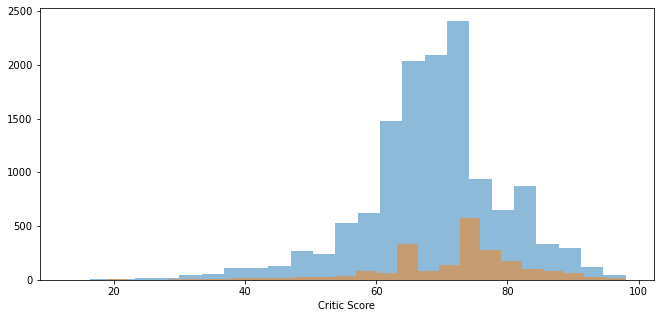

In [10]:
# Визуализируем наши выборки

plt.hist(data_all, bins=25, alpha=0.5); # Выборка всех остальных игр
plt.hist(data_sport, bins=25, alpha=0.5); # Выборка спортивных игр

plt.xlabel("Critic Score")

plt.show()

In [11]:
from scipy.stats import f_oneway # Импортируем функцию для дисперсионного анализа из библиотеки scipy пакета stats

F, p = f_oneway(data_sport, data_all) # Проводим дисперсионный анализ

alpha = 0.03 # Уровень значимости

print(F, p) # Смотрим на результаты дисперсионного анализа

print()

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0) - критики одинаково оценивают все игры')
else:
    print('Разное распределение (отклоняем H0) - критики относительно лучше оценивают спортивные игры')

188.54884556984746 1.1679250309498132e-42

Разное распределение (отклоняем H0) - критики относительно лучше оценивают спортивные игры


## Критикам нравятся больше игры на PC или на PS4?
  
H0 - Оценка критиков не зависит от выбора из этих платформ  
H1 - Есть различие между оценками этих платформ

In [12]:
data['Platform'].unique() # Проверяем названия платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
data_PC = data[data['Platform'] == 'PC']['Critic_Score'].dropna() # Первая выборка - игры на PC
data_PS4 = data[data['Platform'] == 'PS4']['Critic_Score'].dropna() # Вторая выборка - игры на PS4

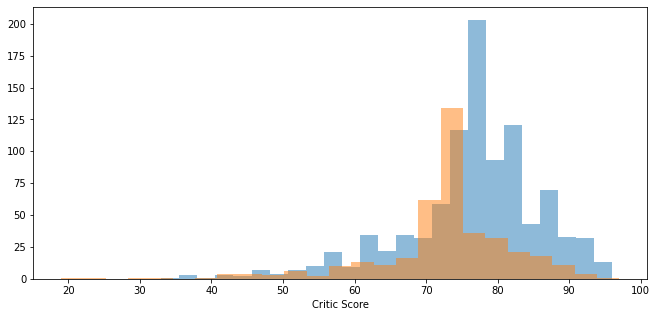

In [14]:
# Визуализируем наши выборки

plt.hist(data_PC, bins=25, alpha=0.5); # Выборка игр на PC
plt.hist(data_PS4, bins=25, alpha=0.5); # Выборка игр на PS4

plt.xlabel("Critic Score")

plt.show()

In [15]:
F, p = f_oneway(data_PC, data_PS4) # Проводим дисперсионный анализ

alpha = 0.03 # Уровень значимости

print(F, p) # Смотрим на результаты дисперсионного анализа

print()

H0 = 0

if p > alpha:
    H0 = 0
    print('Одинаковое распределение (не отвергаем H0) - оценка критиков не зависит от выбора из этих платформ') 
else:
    H0 = 1
    print('Разное распределение (отклоняем H0) - есть различие между оценками этих платформ')

44.79533685741046 3.184778572534202e-11

Разное распределение (отклоняем H0) - есть различие между оценками этих платформ


In [16]:
#print(data_PC.median(), data_PS4.median())
#print(data_PC.mean(), data_PS4.mean())
#print()

if H0 == 1:
    if data_PC.median() > data_PS4.median():
        print('Критики лучше оценивают игры на PC, чем на PS4')
    else:
        print('Критики лучше оценивают игры на PS4, чем на PC')

Критики лучше оценивают игры на PC, чем на PS4


## Критикам больше нравятся стрелялки или стратегии??
  
H0 - Оценка критиков не зависит от выбора из этих двух жанров  
H1 - Есть различие между оценками этих двух жанров

In [17]:
data['Genre'].unique() # Проверяем названия жанров

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [18]:
data_SH = data[data['Genre'] == 'Shooter']['Critic_Score'].dropna() # Первая выборка - игры жанра Shooter
data_ST = data[data['Genre'] == 'Strategy']['Critic_Score'].dropna() # Вторая выборка - игры жанра Strategy

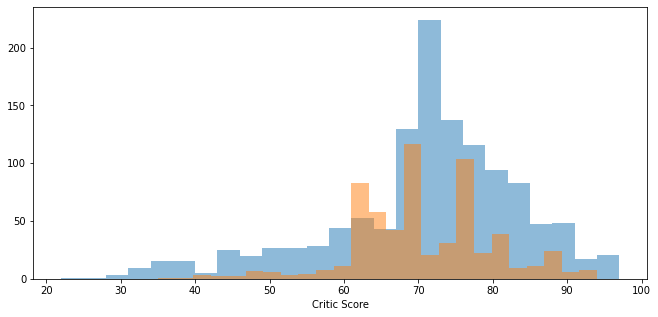

In [19]:
# Визуализируем наши выборки

plt.hist(data_SH, bins=25, alpha=0.5); # Выборка игр на PC
plt.hist(data_ST, bins=25, alpha=0.5); # Выборка игр на PS4

plt.xlabel("Critic Score")

plt.show()

In [20]:
F, p = f_oneway(data_SH, data_ST) # Проводим дисперсионный анализ

alpha = 0.03 # Уровень значимости

print(F, p) # Смотрим на результаты дисперсионного анализа

print()

H0 = 0

if p > alpha:
    H0 = 0
    print('Одинаковое распределение (не отвергаем H0) - оценка критиков не зависит от выбора из этих двух жанров')
else:
    H0 = 1
    print('Разное распределение (отклоняем H0) - есть различие между оценками этих двух жанров')

0.02900778955513991 0.8647796355176031

Одинаковое распределение (не отвергаем H0) - оценка критиков не зависит от выбора из этих двух жанров


In [21]:
#print(data_SH.median(), data_ST.median())
#print(data_SH.mean(), data_ST.mean())
#print()

if H0 == 1:
    if data_SH.median() > data_ST.median():
        print('Критикам больше нравятся Стрелялки')
    else:
        print('Критикам больше нравятся Стратегии')

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer] (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель логистической регрессии (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи confusion_matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [22]:
spam = pd.read_csv('spam.csv', sep=',') # Загружаем наши данные
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
messages = spam['Message'].tolist()
categories = spam['Category'].tolist()

1. Привидите весь текст к нижнему регистру

In [24]:
messages_lc = [message.lower() for message in messages] # Приводим к нижнему регистру

In [25]:
messages_lc

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had you

2. Удалите мусорные символы

In [26]:
import re # Импортируем библиотеку регулярных выражений

In [27]:
messages_ow = [re.sub(r'[^\w\s]+|[\d]+|_+', r'', message) for message in messages_lc] # Уберем все служебные символы и цифры

In [28]:
messages_ow

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send  to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea  prize reward to claim call  claim code kl valid  hours only',
 'had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call

3. Удалите стоп-слова

In [29]:
import nltk # Импортируем библиотеку nltk

In [30]:
from nltk.corpus import stopwords # Импортируем стоп-слова

In [31]:
stopwords_set = set(stopwords.words('english')) # Импортируем список стоп слов

In [32]:
without_sw = []
text_up = ''

for message in messages_ow: # Достаем конкретное сообщение
    text = message.split() # Дробим его на слова
    text_up = ''
    for word_ms in text: # Выбираем конкретное слово
        if word_ms not in stopwords_set: # Проверяем, что ег онкет в стоп-листе
            if len(text_up) == 0: # Если нет, то добавляем назад в наше сообщение
                text_up = word_ms
            else:
                text_up = text_up + ' ' + word_ms
    without_sw.append(text_up) # Добавляем сообщение назад в список

In [33]:
without_sw

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs',
 'u dun say early hor u c already say',
 'nah dont think goes usf lives around though',
 'freemsg hey darling weeks word back id like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hours',
 'mobile months u r entitled update latest colour mobiles camera free call mobile update co free',
 'im gonna home soon dont want talk stuff anymore tonight k ive cried enough today',
 'six chances win cash pounds txt csh send cost pday days tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word clai

4. Привидите все слова к нормальной форме

In [34]:
from nltk.stem.wordnet import WordNetLemmatizer # Импортируем лемматизатор
from nltk import wordnet # Импортируем словарь для лемматизации

In [35]:
wnl = WordNetLemmatizer()

In [36]:
lemmatized_ms = []
text_up = ''

for message in messages_ow: # Достаем конкретное сообщение
    text = message.split() # Дробим его на слова
    text_up = ''
    for word_ms in text: # Выбираем конкретное слово
        word_nrm = wnl.lemmatize(word_ms) # Приводим к нормальной форме
        if len(text_up) == 0: # Добавляем назад в наше сообщение
            text_up = word_nrm
        else:
            text_up = text_up + ' ' + word_nrm
    lemmatized_ms.append(text_up) # Добавляем сообщение назад в список

In [37]:
lemmatized_ms

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply over',
 'u dun say so early hor u c already then say',
 'nah i dont think he go to usf he life around here though',
 'freemsg hey there darling it been week now and no word back id like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile update co free

5. Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

In [38]:
all_ms = '-'.join(lemmatized_ms) # Выводим набор слов из всех наших сообщений
all_word = all_ms.split()
all_word

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat-ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni-free',
 'entry',
 'in',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'st',
 'may',
 'text',
 'fa',
 'to',
 'to',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 'over-u',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'then',
 'say-nah',
 'i',
 'dont',
 'think',
 'he',
 'go',
 'to',
 'usf',
 'he',
 'life',
 'around',
 'here',
 'though-freemsg',
 'hey',
 'there',
 'darling',
 'it',
 'been',
 'week',
 'now',
 'and',
 'no',
 'word',
 'back',
 'id',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'to',
 'rcv-even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me',
 'they',
 'treat',
 'me',
 'like',
 'ai

In [39]:
from gensim import corpora # Импортируем corpora

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [40]:
dictionary = corpora.Dictionary([all_word]) # Cоздадим словарь, в котором присвоем каждому слову свой уникальный id
dict(dictionary)

{0: 'a',
 1: 'a-dear',
 2: 'a-i',
 3: 'aa',
 4: 'aah',
 5: 'aaniye',
 6: 'aathilove',
 7: 'ab',
 8: 'abbey',
 9: 'abdomen',
 10: 'abelu',
 11: 'aberdeen',
 12: 'abi',
 13: 'abi-do',
 14: 'abi-someone',
 15: 'ability',
 16: 'abiola-all',
 17: 'abiola-and',
 18: 'abiola-did',
 19: 'abiola-hurry',
 20: 'abiola-i',
 21: 'abiola-nope',
 22: 'abiola-now',
 23: 'abiola-that',
 24: 'abiola-there',
 25: 'abiola-today',
 26: 'abiola-will',
 27: 'abj',
 28: 'abj-prof',
 29: 'able',
 30: 'abnormally',
 31: 'about',
 32: 'about-do',
 33: 'about-even',
 34: 'about-i',
 35: 'about-men',
 36: 'about-mm',
 37: 'about-my',
 38: 'about-no',
 39: 'about-what',
 40: 'about-when',
 41: 'about-yup-ok-u',
 42: 'aboutas',
 43: 'above',
 44: 'abroad',
 45: 'absence',
 46: 'absolutely',
 47: 'abstract',
 48: 'abt',
 49: 'abta',
 50: 'aburo',
 51: 'abuse-well',
 52: 'abuser',
 53: 'ac',
 54: 'academic',
 55: 'acc',
 56: 'acc-u',
 57: 'accent',
 58: 'accenture',
 59: 'accept',
 60: 'access',
 61: 'access-any',
 62

In [41]:
bows = [dictionary.doc2bow(message.split()) for message in lemmatized_ms] # Словарь частоты слов в тексте сообщения
  
bows

[[(392, 1),
  (731, 1),
  (1322, 1),
  (1324, 1),
  (1795, 1),
  (2138, 1),
  (2888, 1),
  (3874, 1),
  (3958, 1),
  (3998, 1),
  (4714, 1),
  (5145, 1),
  (5326, 1),
  (6687, 1),
  (7330, 1),
  (7956, 1),
  (10324, 1),
  (11117, 1),
  (11427, 1),
  (11820, 1)],
 [(5110, 1), (5371, 1), (7217, 1), (7320, 1), (10980, 1), (11664, 1)],
 [(0, 1),
  (518, 1),
  (1959, 1),
  (2196, 1),
  (3076, 2),
  (3260, 2),
  (3408, 1),
  (3606, 1),
  (4714, 1),
  (6112, 1),
  (7491, 1),
  (8342, 1),
  (8408, 1),
  (8484, 1),
  (9684, 1),
  (10186, 1),
  (10535, 1),
  (10558, 3),
  (10958, 1),
  (11683, 1),
  (11747, 1)],
 [(327, 1),
  (1392, 1),
  (2871, 1),
  (2901, 1),
  (4478, 1),
  (8922, 2),
  (9450, 1),
  (10297, 1),
  (10980, 2)],
 [(593, 1),
  (2742, 1),
  (3874, 1),
  (4208, 2),
  (4289, 1),
  (4629, 1),
  (5586, 1),
  (6700, 1),
  (10383, 1),
  (10427, 1),
  (10558, 1),
  (11196, 1)],
 [(411, 1),
  (790, 1),
  (937, 1),
  (1739, 1),
  (2303, 1),
  (3541, 1),
  (3706, 1),
  (4331, 1),
  (4650, 1

In [42]:
from gensim.models import TfidfModel # Импортируем TfidfModel

In [43]:
tfidf_ms = TfidfModel(bows) # Применяем модель чтобы найти частоту слова во всех текстах

In [44]:
tfidf_ms[bows[0]] # Вектор сообщения №1 Почему эти значения не совпадают с теми, что я получаю в матрице?

[(392, 0.35118333752306435),
 (731, 0.2382987618707794),
 (1322, 0.3229621936099931),
 (1324, 0.27195657025260783),
 (1795, 0.27195657025260783),
 (2138, 0.2437354263395366),
 (2888, 0.1748596760077356),
 (3874, 0.12033694589791329),
 (3958, 0.12995203925528728),
 (3998, 0.1620892639565461),
 (4714, 0.07927794830091929),
 (5145, 0.35118333752306435),
 (5326, 0.26172442786371825),
 (6687, 0.15559000169600595),
 (7330, 0.1342614999575288),
 (7956, 0.20882476512639916),
 (10324, 0.13406433490213931),
 (11117, 0.2169949730340453),
 (11427, 0.1670809567353429),
 (11820, 0.20760931652773623)]

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer # Импортируем TfidfVectorizer

In [46]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(lemmatized_ms) # Строим матрицу
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

tfidf_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте [train_test_split] (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [47]:
from sklearn.model_selection import train_test_split # Импортируем метод train_test_split для разделения данных

In [48]:
# Разделяем наши данные 30/70
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, categories, test_size=0.30, random_state=42) 

7. Постройте модель логистической регрессии (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите random_state=42, оцените ее точность на тестовых данных

In [49]:
from sklearn.linear_model import LogisticRegression # Импортируем модель логистической регрессии

In [50]:
clf = LogisticRegression(random_state=42)

In [51]:
clf.fit(X_train, y_train) # Обучаем данные

LogisticRegression(random_state=42)

In [52]:
clf.predict(X_test) # Получаем предсказания на тестовой выборке

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [53]:
clf.score(X_test, y_test) # Точность для тестовых данных

0.965311004784689

In [54]:
clf.score(tfidf_matrix, categories) # Точность для всего датасета

0.9678750897343862

8. Опишите результаты при помощи confusion_matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)

In [55]:
from sklearn.metrics import confusion_matrix # Импортируем confusion_matrix

In [56]:
y_pred = clf.predict(tfidf_matrix) # Делаем предсказания для всего датасета

In [57]:
confusion_matrix(categories, y_pred) # Получаем нашу матрицу

array([[4821,    4],
       [ 175,  572]], dtype=int64)

179 ошибочных результатов (175 + 4), в идеале должно быть 0, но у нашей модели достаточно высокая точность

9. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [58]:
spam['Predict'] = y_pred # Добавляем столбец с предсказаниями к нашему исходному датафрейму

In [59]:
spam.head()

,Category,Message,Predict
0,ham,"Go until jurong point, crazy.. Available only ...",ham
1,ham,Ok lar... Joking wif u oni...,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,ham,U dun say so early hor... U c already then say...,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",ham


In [60]:
spam.loc[spam['Category'] != spam['Predict']] # Оставляем только строки на которых наша модель допустила ошибку

,Category,Message,Predict
5,spam,FreeMsg Hey there darling it's been 3 week's n...,ham
15,spam,"XXXMobileMovieClub: To use your credit, click ...",ham
19,spam,England v Macedonia - dont miss the goals/team...,ham
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...,ham
68,spam,"Did you hear about the new ""Divorce Barbie""? I...",ham
...,...,...,...
5449,spam,"Latest News! Police station toilet stolen, cop...",ham
5456,spam,For the most sparkling shopping breaks from 45...,ham
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...,ham
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,ham
